<a href="https://colab.research.google.com/github/meghaninglis/Neural-Data/blob/main/final_project_2023.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#Import modules
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats

In [3]:
#Import data sets
url1 = 'https://raw.githubusercontent.com/meghaninglis/Neural-Data/main/alzheimers_IDs_final_project.xlsx%20-%20SEA-AD_Cohort_Metadata.csv'
alz_ID = pd.read_csv(url1)
url2 = 'https://raw.githubusercontent.com/meghaninglis/Neural-Data/main/alzheimers_pathology_final_project%20-%20alzheimers_pathology_final_project.csv'
alz_path = pd.read_csv(url2)
url3 = 'https://raw.githubusercontent.com/meghaninglis/Neural-Data/main/Neural%20Data%20final%20project%20-%20Sheet1%20(1).csv'
combined_data = pd.read_csv(url3)

In [4]:
#Create variables
sex = alz_ID.iloc[:,4]
cog_status = alz_ID.iloc[:,17]
brain_ph = alz_ID.iloc[:,52] 
PMI = alz_ID.iloc[:,-17] 
AT8layer1_percentposarea = alz_path.iloc[:,3]
AT8layer4_percentposarea = alz_path.iloc[:,6]

Text(0.5, 1.0, 'Distribution of Brain pH Levels')

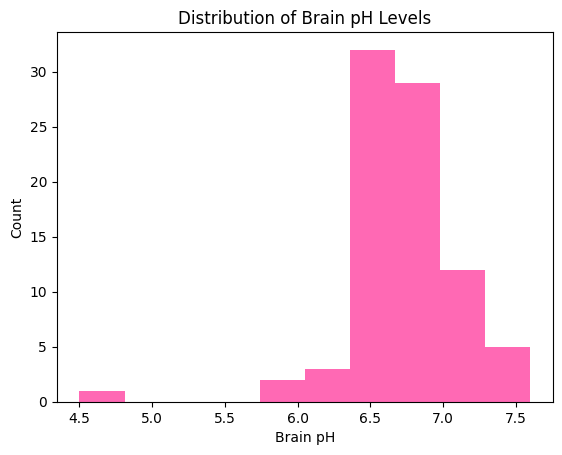

In [5]:
#Creat Histogram of brain pH
plt.hist(brain_ph, color = "hotpink")
plt.xlabel('Brain pH')
plt.ylabel('Count')
plt.title('Distribution of Brain pH Levels')

Text(0.5, 1.0, 'Distribution of PMI Levels')

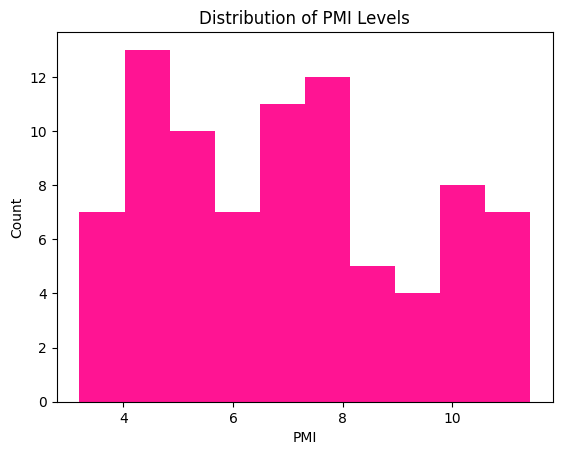

In [6]:
#Creat Histogram of PMI
plt.hist(PMI, color = "deeppink")
plt.xlabel('PMI')
plt.ylabel('Count')
plt.title('Distribution of PMI Levels')

Text(0.5, 1.0, 'Distribution of AT8 Layer 1 Percent Positive Area')

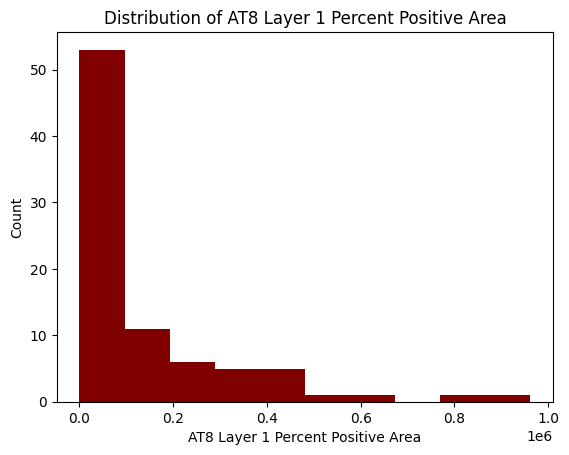

In [7]:
#Creat Histogram of AT8 layer 1 positive area percent
plt.hist(AT8layer1_percentposarea, color = "maroon")
plt.xlabel('AT8 Layer 1 Percent Positive Area')
plt.ylabel('Count')
plt.title('Distribution of AT8 Layer 1 Percent Positive Area')

Text(0.5, 1.0, 'Distribution of AT4 Layer 4 Percent Positive Area')

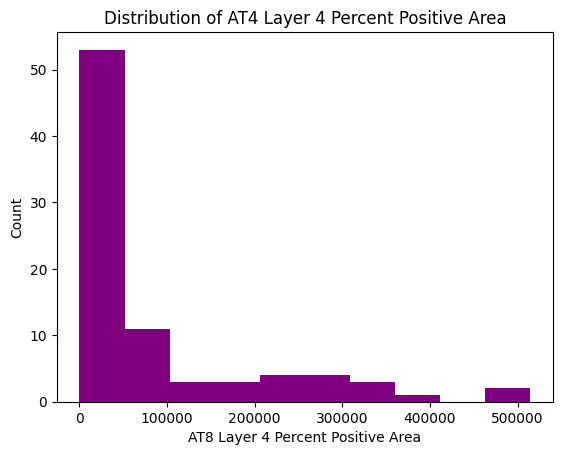

In [25]:
#Creat Histogram of AT8 layer 4 positive area percent
plt.hist(AT8layer4_percentposarea, color = "purple")
plt.xlabel('AT8 Layer 4 Percent Positive Area')
plt.ylabel('Count')
plt.title('Distribution of AT4 Layer 4 Percent Positive Area')

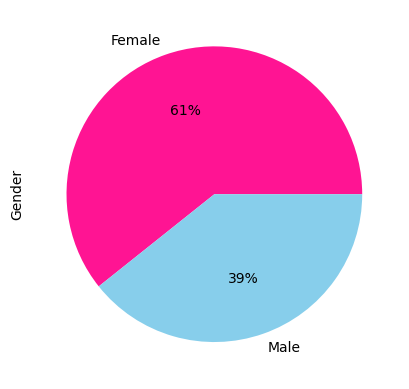

In [24]:
#Create pie plot of men v women
colors = ['deeppink', 'skyblue']
alz_ID['Sex'].value_counts().plot(kind='pie', colors=colors, autopct='%1.0f%%')

# Add y label
plt.ylabel('Gender')

# Show the plot!
plt.show()

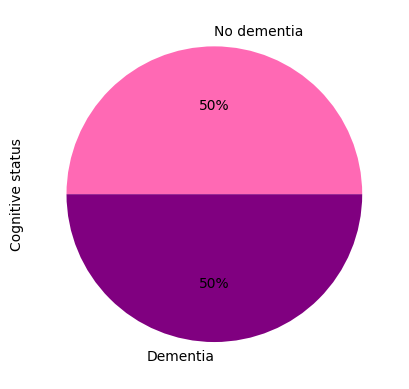

In [23]:
#Create pie plot of cognitive status
colors = ['hotpink', 'purple']
alz_ID['Cognitive Status'].value_counts().plot(kind='pie', colors = colors, autopct='%1.0f%%')


# Add y label
plt.ylabel('Cognitive status')

# Show the plot!
plt.show()

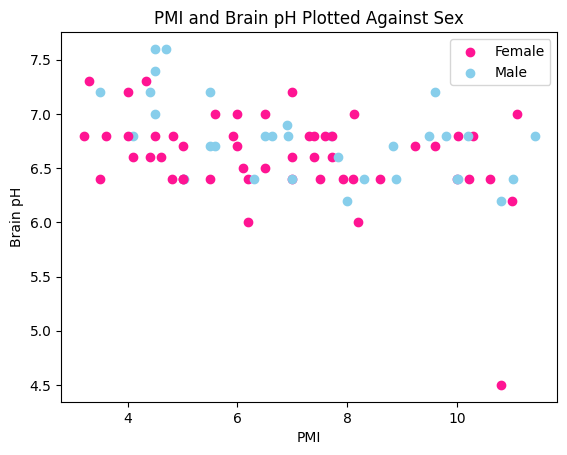

In [11]:
#Making a scatterplot 
alz_ID_length = len(alz_ID)

for i in range(alz_ID_length):
  if alz_ID.iloc[i,4]== 'Female':
    plt.scatter(alz_ID.iloc[i,-17],alz_ID.iloc[i,52], color="deeppink")
  else:
    plt.scatter(alz_ID.iloc[i,-17],alz_ID.iloc[i,52], color="skyblue")   
    plt.ylabel("Brain pH")
    plt.xlabel("PMI")
    plt.legend(['Female', 'Male'])
    plt.title("PMI and Brain pH Plotted Against Sex")   
   

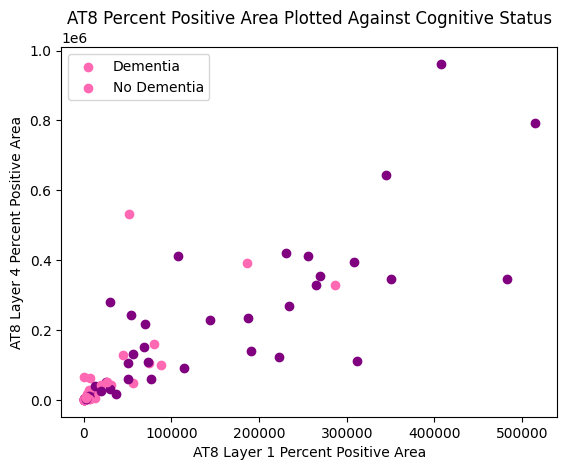

In [12]:
#Make another scatter plot
alz_combined_length = len(combined_data)

for i in range(alz_combined_length):
  if combined_data.iloc[i,-1]== 'Dementia':
    plt.scatter(combined_data.iloc[i,-2],combined_data.iloc[i,-3], color="purple")
  else:
    plt.scatter(combined_data.iloc[i,-2],combined_data.iloc[i,-3], color="hotpink")   
    plt.xlabel("AT8 Layer 1 Percent Positive Area")
    plt.ylabel("AT8 Layer 4 Percent Positive Area")
    plt.title("AT8 Percent Positive Area Plotted Against Cognitive Status") 
plt.legend(['Dementia', 'No Dementia'])

In [20]:
# Make variables into numpy arrays
female_PMI = np.array(combined_data.loc[combined_data['Sex'] == 'Female', ['PMI']])
female_brain_ph = np.array(combined_data.loc[combined_data['Sex'] == 'Female', ['Brain pH']])
male_PMI = np.array(combined_data.loc[combined_data['Sex'] == 'Male', ['PMI']])
male_brain_ph = np.array(combined_data.loc[combined_data['Sex'] == 'Male', ['Brain pH']])
ND_layer1 = np.array(combined_data.loc[combined_data['Cognitive Status'] == 'No Dementia', ['total AT8 positive area_Layer1']])
ND_layer4 = np.array(combined_data.loc[combined_data['Cognitive Status'] == 'No Dementia', ['total AT8 positive area_Layer4']])
D_layer1 = np.array(combined_data.loc[combined_data['Cognitive Status'] == 'Dementia', ['total AT8 positive area_Layer1']])
D_layer4 = np.array(combined_data.loc[combined_data['Cognitive Status'] == 'Dementia', ['total AT8 positive area_Layer4']])

[Text(0.5, 1.0, 'AT8 Layer 4 Distribution')]

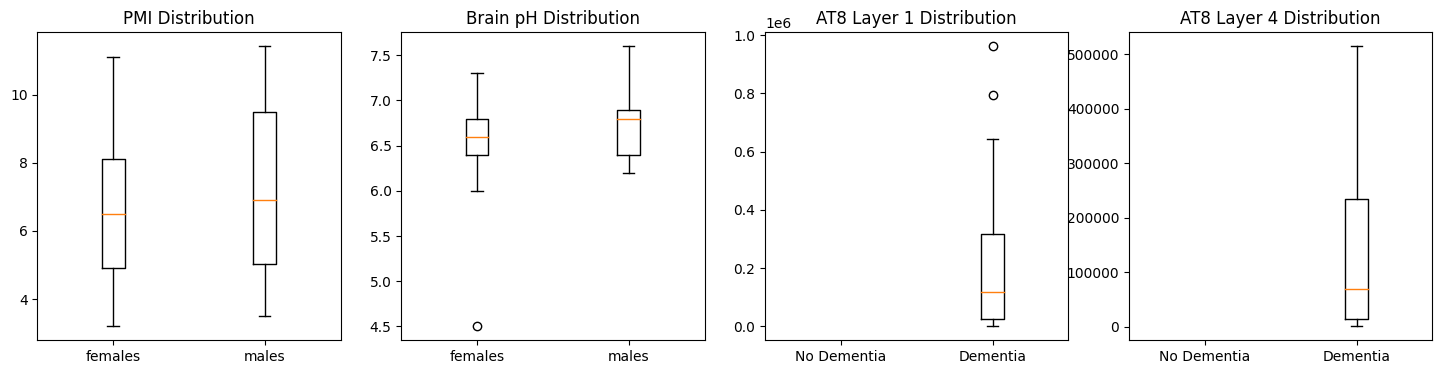

In [22]:
# Make box plots
fig, ax = plt.subplots(1,4, figsize = (18,4))

#PMI
PMI = [female_PMI.flatten(), male_PMI.flatten()]
ax[0].boxplot(PMI)
ax[0].set_xticklabels(['females','males'])
ax[0].set(title = 'PMI Distribution')
#Brain PH
brain_ph = [female_brain_ph.flatten(), male_brain_ph.flatten()]
ax[1].boxplot(brain_ph)
ax[1].set_xticklabels(['females','males'])
ax[1].set(title = 'Brain pH Distribution')
#Layer 1
layer1 = [ND_layer1.flatten(), D_layer1.flatten()]
ax[2].boxplot(layer1)
ax[2].set_xticklabels(['No Dementia','Dementia'])
ax[2].set(title = 'AT8 Layer 1 Distribution')
#Layer 2
layer4 = [ND_layer4.flatten(), D_layer4.flatten()]
ax[3].boxplot(layer4)
ax[3].set_xticklabels(['No Dementia','Dementia'])
ax[3].set(title = 'AT8 Layer 4 Distribution')

In [15]:
#Stats for box plots
print(stats.mannwhitneyu(female_PMI, male_PMI))
print(stats.mannwhitneyu(female_brain_ph, male_brain_ph))
print(stats.mannwhitneyu(ND_layer1, D_layer1))
print(stats.mannwhitneyu(ND_layer4, D_layer4))

MannwhitneyuResult(statistic=array([751.5]), pvalue=array([0.41226106]))
MannwhitneyuResult(statistic=array([714.5]), pvalue=array([0.23750131]))
MannwhitneyuResult(statistic=array([nan]), pvalue=array([nan]))
MannwhitneyuResult(statistic=array([nan]), pvalue=array([nan]))


In [18]:
#Stats for histograms
print(stats.skewtest(combined_data['PMI']))
print(stats.skewtest(combined_data['Brain pH']))
print(stats.skewtest(combined_data['total AT8 positive area_Layer1']))
print(stats.skewtest(combined_data['total AT8 positive area_Layer4']))

SkewtestResult(statistic=1.0089559346790171, pvalue=0.31299576777108995)
SkewtestResult(statistic=-4.536684577914547, pvalue=5.714547634271498e-06)
SkewtestResult(statistic=5.934896381068895, pvalue=2.940311385464904e-09)
SkewtestResult(statistic=5.2754311788440065, pvalue=1.324443092515016e-07)
